# **Basic theory of integration**

Integration is basically differentiation in reverse, although some mathematicians would quibble about this. For this reason, the process of *integrating* a function is sometimes termed *taking the anti-derivative*. 

Unlike differentiation, there is often no prescribed process or 'recipe' to integrate a particular function, you literally think about reversing the process of taking a derivative.  

**How do we 'reassemble' a function from its derivative?**

Let's adopt the normal convention when discussing integrals that F(x) is the original function (we are trying to find this), and f(x) is the derivative (which we have). How do we 'build' the original function back up from the derivative? <br>
<br>
Let's start at x = 0. We don't know what the value of the function, F(0), is at this point, so we'll just assume it's a constant, c. We're going to build our function up using tiny steps, delta_x. <br><br>How do we get F one step later, i.e. F(delta_x)? We start at F(0) = c and add on delta_x * f(0), given that f(0) is the *gradient* at x=0, so f(0) * delta_x gives us a small change in F. <br><br>What about F(2 * delta_x)? This will be given by c + delta_x * f(0) + delta_x * f(x), i.e. the sum of the constant and *two* small changes in F.<br><br> We keep doing this all the way up to the x-value we are interested in.

**Let's do this using SymPy**<br>
As for derivatives, we'll derive this formally once

In [1]:
from sympy import Symbol, symbols, Sum, Limit, oo, init_printing
init_printing()

In [2]:
x, N, i, c = symbols('x, N, i, c')

In [4]:
# Here's our gradient function
# A cubic gradient means that the original function F is quartic
f_x = x**3+2*x
# N is the total number of integration steps. So delta_x = x / N
delta_x = x/N
# This is what we pass in to be summed
arg = (f_x.subs({x: i*delta_x}))*delta_x

In [5]:
# We sum our argument over N integration steps, and add on the unknown constant
disc_sum = c + Sum(arg, (i,1,N))

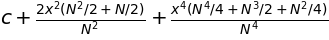

In [6]:
disc_sum.doit()

In [7]:
# As for the derivative, we get the integral by taking the limit as delta_x goes to zero.
# Here this is equivalent to letting N go to infinity
F_x = Limit(disc_sum, N, oo).doit()
F_x

So F(x) is a quartic function, as expected

**The significance of c**<br>
What's the deal with this c-value? <br>
The *constant of integration*, as it is known, arises because the original function F(x) may have contained a constant that would have disappeared on differentiation. So, when we integrate the gradient f(x), hoping to get back to F(x), we cannot know what constant value, if any, was present prior to differentiation. Let's see this more clearly...

In [8]:
from sympy import Derivative, Integral

In [9]:
# Here's our original function with constant +2
F_x = 4*x**3 - 12*x + 2
F_x

In [10]:
# Here's the derivative. Note that the constant has disappeared, as it doesn't depend on x by definition
f_x = Derivative(F_x, x, 1).doit()
f_x

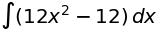

In [11]:
integral = Integral(f_x, x)
integral

In [12]:
integral.doit()

Note that the original constant +2 has disappeared! This is why we pop in a constant c to remind ourselves that the integrated function is defined *only up to a constant*! <br><br> Integrals defined in this way are known as *indefinite integrals*: indefinite because we cannot really know the true form of the original function without knowing the coordinates of at least one point lying upon it.

**Definite integrals and the area under a curve**<br><br>
If you look carefully at what we did above, you can see that we summed up a whole series of really thin rectangles of height f(x) and width delta_x, where each rectangle was bounded above by the height of the function at that point f(x), and below by the x-axis. We began adding the strips together at x = 0 on the left, and stopped at x on the right. <br><br>
**The integral of a function is related in some fashion to the area under the curve**. This is a key finding! <br><br>
To be more precise, we need to think about properly bounding the area to be integrated on the left and right. Then, we avoid any problems related to the constant of integration, and we are dealing with a fully defined problem.<br><br>
//Show this on board, definition of a definite integral as F(right_limit) - F(left_limit), cancellation of c<br><br>
These bounds are known as the *limits of integration*, and are typically written above and below the long integral sign (the *summa*). When upper and lower limits are present, the integral is termed a *definite integral*, yielding the area under the curve between the two limits.<br><br>


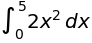

In [13]:
f_x = 2*x**2
def_integral = Integral(f_x, (x, 0, 5)) 
def_integral

In [14]:
from sympy import plot
plot(f_x, (x, 0, 5))

<Figure size 640x480 with 1 Axes>

In [15]:
# Now let's get the area
def_integral.doit()

// Show the working for this on the board

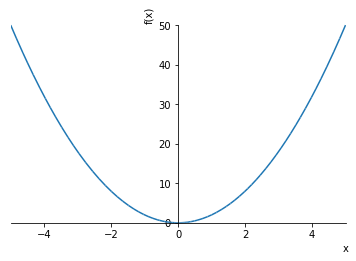

In [16]:
# Let's extend the left limit of integration to -5
# Before you do the integral, look at this plot of the function on that domain and try to figure out
# whether the extended area will be simply related to the area we calculated above.
plot(f_x, (x, -5, 5))

In [17]:
extended_def_integral = Integral(f_x, (x, -5, 5)).doit()
extended_def_integral

// Double the previous area because x^2 is an *even* function, i.e. f(x) = f(-x), so the +ve x section contributes an area equal to the -ve x section.
// We can also define an *odd* function as one obeying f(x) = -f(-x)

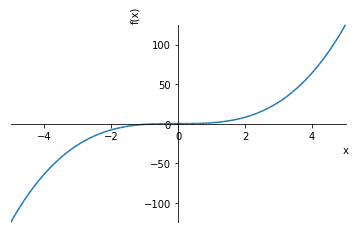

In [18]:
# The definite integral of an odd function between limits symmetric around zero is zero
# // Discuss this on board
# The simplest cubic is a good example of an odd function
cubic = x**3
plot(cubic, (x, -5, 5))

Note that the area provided by a definite integral is a *signed* area. By this, we mean that if f(x) is positive at and everywhere between the limits of integration, the area will also be positive. Similarly, if f(x) is negative at and everywhere between the limits of integration, the area will be negative. If f(x) is in places positive and in places negative between the limits of integration, then the integrated area could potentially be zero! 

In [19]:
# Positive interval between limits
def_integral_pos = Integral(cubic, (x, 0, 5))
def_integral_pos.doit()

In [20]:
# Negative interval between limits
def_integral_neg = Integral(cubic, (x, -5, 0))
def_integral_neg.doit()

In [21]:
# Symmetric limits - the positive and negative parts cancel
def_integral_symm = Integral(cubic, (x, -5, 5))
def_integral_symm.doit()

// Try doing similar definite integrals with symmetric limits for sin() and cos()

# **Differential equations**

A *differential equation* is an equation in which an unknown function and a derivative occur together. In solving this equation we are looking for a function that satisfies the equation. The function we get may have undetermined parameters of some sort, which we would then need to determine based upon the *initial conditions* of the problem under study.<br><br> 
So far, so dry. Let's look at a real example

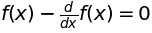

In [37]:
from sympy import Function, dsolve, Derivative, Eq, simplify
f = Function('f')
f_p = Derivative(f(x), x, 1)
diff_eq = Eq(f(x) - f_p, 0)
# Here's our differential equation. Note that the function and the derivative both occur together in it!
diff_eq

In [38]:
# Now let's solve it using dsolve
soln = dsolve(diff_eq)
soln

Note that the solution involves a freely definable variable C_1

In [44]:
# Let's verify this works
diff_eq.lhs.subs({f(x): soln.rhs}).doit()

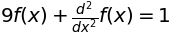

In [46]:
# Let's try another!
f = Function('f')
f_p2 = Derivative(f(x), x, 2)
diff_eq = Eq(f_p2 + 9*f(x), 1)
diff_eq

In [48]:
soln = dsolve(diff_eq)
soln

Now we have two freely definable variables

# **Solving differential equations - predator & prey model**

**Lotka-Volterra equations**

$${\begin{aligned}{\frac {dx}{dt}}&=\alpha x-\beta xy\\[6pt]{\frac {dy}{dt}}&=\delta xy-\gamma y\end{aligned}}$$

The Lotka-Volterra model is one of the simplest models of the interaction between predator and prey species in an ecosystem. As you can see, they take the form of two coupled differential equations, where x is the population of prey animals, and y, the population of predator animals.<br><br>
The interaction between the species is defined by four adjustable parameters $$\alpha, \beta, \gamma, \delta$$ where *alpha* governs the growth rate of the prey population, *beta* governs the rate at which the prey population is decreased by predation, *gamma* governs the decline rate of the predator population without food, and *delta* governs the rate at which the predator population is increased by predation.

In [74]:
import numpy as np
from scipy.integrate import odeint
alpha, beta, gamma, delta = 1, 0.2, 2, 0.1

def dP_dt(P, t):
# Here dP_dt takes t as an argument, but doesn't use it
    dx_dt = alpha*P[0] - beta*P[0]*P[1]
    dy_dt = delta*P[0]*P[1] - gamma*P[1]
    return [dx_dt, dy_dt]

# Set up a time array
t = np.linspace(0, 20, 20000)
# Here are the initial populations of prey P0[0] and predator P0[1]
P0 = [8, 5]
# Solve the differential equations for predator and prey populations by numerical integration.
P_soln = odeint(dP_dt, P0, t)
# Get the predator and prey populations from the P_soln array
x = P_soln[:,0]
y = P_soln[:,1]

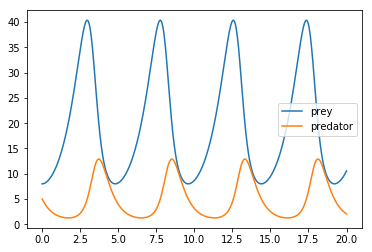

In [75]:
import matplotlib.pyplot as plt
plt.plot(t, x, label="prey")
plt.plot(t, y, label="predator")
plt.legend()